In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [5]:
df = pd.read_csv("../../data/training/BERRatingData_aa.csv", sep=";", on_bad_lines="skip", low_memory=False)
print(df.shape)

(9997, 211)


In [6]:
df.head()

,CountyName,DwellingTypeDescr,Year_of_Construction,TypeofRating,EnergyRating,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,...,ThirdWallAgeBandId,ThirdWallTypeId,SA_Code,prob_smarea_error_0corr,prob_smarea_error_100corr,RER,RenewEPnren,RenewEPren,CPC,EPC
0,Co. Dublin,Semi-detached house,2019,Final,A2,49.40,118.30,0.18,0.16,0.21,...,NaN,NaN,267105014/02,0.017443,0.017443,NaN,NaN,NaN,0.330,0.345
1,Co. Dublin,Semi-detached house,2019,Final,A2,49.93,118.30,0.18,0.16,0.21,...,NaN,NaN,267105014/02,0.017443,0.017443,NaN,NaN,NaN,0.333,0.348
2,Co. Galway,Detached house,1940,Existing,D2,288.33,116.18,0.86,0.86,0.65,...,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Co. Wicklow,Mid-terrace house,1977,Existing,D1,230.10,85.50,0.35,0.13,0.61,...,NaN,NaN,257051043,0.000222,0.012347,NaN,NaN,NaN,NaN,NaN
4,Co. Kerry,Detached house,1939,Existing,E2,349.73,123.07,0.38,1.57,0.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,Year_of_Construction,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,UValueWindow,UvalueDoor,WallArea,RoofArea,...,ThirdWallUValue,ThirdWallAgeBandId,ThirdWallTypeId,prob_smarea_error_0corr,prob_smarea_error_100corr,RER,RenewEPnren,RenewEPren,CPC,EPC
count,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,...,1524.000000,1524.000000,1524.000000,7.927000e+03,7927.000000,4022.000000,4022.000000,4022.000000,8917.000000,8917.000000
mean,1990.924777,182.304705,114.719480,0.585973,0.344891,0.370897,2.275022,2.119993,93.973569,66.134782,...,0.744456,6.280184,7.650262,2.136352e-02,0.026944,0.090820,20611.417282,1342.949977,1.130298,1.052932
std,32.597948,142.914213,56.519792,0.518962,0.471128,0.263980,0.876287,1.063934,54.534368,49.312061,...,0.599472,3.308931,2.722271,5.461909e-02,0.031571,0.168626,15085.801321,3528.263087,0.962713,0.735000
min,1760.000000,6.250000,11.510000,0.100000,0.000000,0.000000,0.000000,0.000000,3.250000,0.000000,...,0.080000,0.000000,1.000000,5.642000e-09,0.002500,0.000000,1702.420000,0.000000,-0.090000,0.033000
25%,1980.000000,66.250000,80.870000,0.210000,0.130000,0.140000,1.400000,1.360000,53.770000,42.460000,...,0.339000,4.000000,5.000000,3.649369e-05,0.012347,0.000000,10806.875000,0.000000,0.354000,0.386000
50%,2002.000000,163.750000,103.680000,0.440000,0.200000,0.370000,2.200000,2.800000,89.560000,58.000000,...,0.522000,7.000000,8.000000,9.334863e-04,0.017443,0.000000,17737.750000,0.000000,1.036000,1.009000
75%,2018.000000,228.840000,132.550000,0.600000,0.380000,0.570000,2.800000,3.000000,113.860000,82.220000,...,1.130000,9.000000,10.000000,1.868260e-02,0.050000,0.125750,25974.225000,1211.995000,1.435000,1.342000
max,2020.000000,1873.530000,865.832000,2.400000,2.300000,1.230000,5.700000,5.900000,770.910000,514.340000,...,5.900000,10.000000,14.000000,9.452809e-01,0.400000,1.708000,182707.000000,91226.100000,12.730000,8.185000


In [8]:
print(df.EnergyRating.value_counts())

A3    1440
C1    1220
A2    1177
C2    1032
B3     940
C3     812
D1     727
D2     643
B2     498
G      403
E1     331
B1     276
F      239
E2     235
A1      24
Name: EnergyRating, dtype: int64


In [10]:
X = df.drop('EnergyRating', axis='columns')
y = df.EnergyRating
print(X.shape)
print(y.shape)

(9997, 210)
(9997,)


In [11]:
X = pd.get_dummies(X)

feature_names = X.columns
X.head()

,Year_of_Construction,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,UValueWindow,UvalueDoor,WallArea,RoofArea,...,SA_Code_97093001,SA_Code_97100003,SA_Code_97101001,SA_Code_97101002,SA_Code_97101006,SA_Code_97103001,SA_Code_97107001,SA_Code_97110002,SA_Code_97110003,SA_Code_97112002
0,2019,49.40,118.30,0.18,0.16,0.21,1.4,1.40,74.60,62.30,...,0,0,0,0,0,0,0,0,0,0
1,2019,49.93,118.30,0.18,0.16,0.21,1.4,1.40,74.60,62.30,...,0,0,0,0,0,0,0,0,0,0
2,1940,288.33,116.18,0.86,0.86,0.65,3.1,3.02,125.05,82.29,...,0,0,0,0,0,0,0,0,0,0
3,1977,230.10,85.50,0.35,0.13,0.61,2.7,3.00,43.09,42.75,...,0,0,0,0,0,0,0,0,0,0
4,1939,349.73,123.07,0.38,1.57,0.76,3.1,3.00,148.04,73.72,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, y, stratify=y, random_state=2)

In [18]:
for d in range(2,15):
    model = DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Depth: ", d, "Accuracy:", scores.mean())

Depth:  2 Accuracy: 0.40296197464976646
Depth:  3 Accuracy: 0.4683109628641316
Depth:  4 Accuracy: 0.6721336001778964
Depth:  5 Accuracy: 0.7971117633978207
Depth:  6 Accuracy: 0.7996664442961975
Depth:  7 Accuracy: 0.9190366911274183
Depth:  8 Accuracy: 0.9398422059150544
Depth:  9 Accuracy: 0.9505062930842785
Depth:  10 Accuracy: 0.9619857682899712
Depth:  11 Accuracy: 0.9312964198354458
Depth:  12 Accuracy: 0.984662663998221
Depth:  13 Accuracy: 0.9922623082054705
Depth:  14 Accuracy: 0.993330309094952


In [22]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train,y_train)


print("Training Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

Training Accuracy: 0.9317060157396292
Test Accuracy: 0.926


In [23]:
y_hat = model.predict(X_test)
cm = confusion_matrix(y_test, y_hat)

print("CM", cm)

CM [[  5   1   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 294   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1 359   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  63   1   0   5   0   0   0   0   0   0   0   0]
 [  0   0   0   1 100   0  23   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 197  38   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1 303   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1  53 202   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   3   4 193   3   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 182   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 161   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1  81   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  25  34   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15   0  45   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   4  96]]


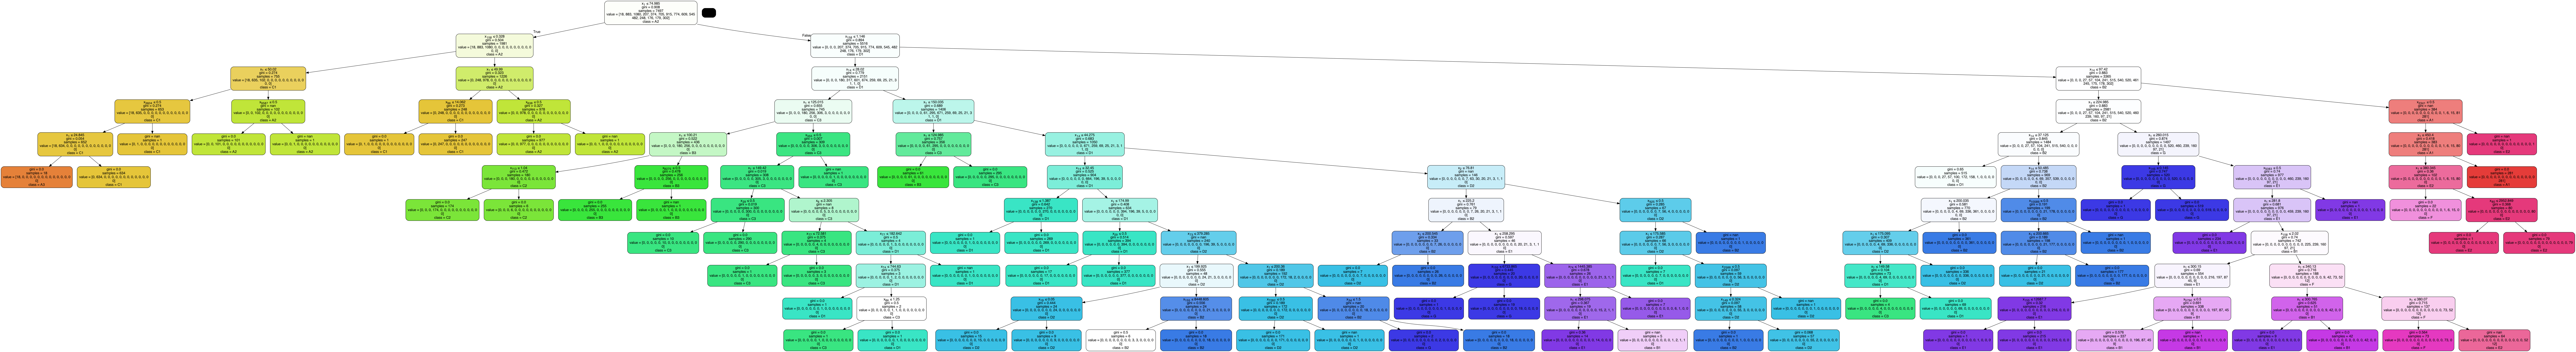

In [34]:
dot_data = StringIO()
feature_names = ["CountyName", "DwellingTypeDescr", "Year_of_Construction", ""]
target_names = ["A3", "C1", "A2", "C2", "B3", "C3", "D1", "D2", "B2", "G", "E1", "B1", "F", "E2", "A1"]
export_graphviz(model, 
                out_file=dot_data,
                filled=True, 
                rounded=True,
                special_characters=True,
                #feature_names = feature_names, 
                class_names = target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('BER_DecisionTree.png')
Image(graph.create_png())